In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, quantile_transform
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm

In [476]:
df = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/MBAN 6110 - Data Science/Assignment 3/kc_house_data.csv')

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [478]:
df.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [479]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [480]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [481]:
df['date'] = pd.to_datetime(df['date'])

In [482]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [483]:
df.insert(2, 'sale_month', df['date'].dt.month)
df.insert(3, 'sale_year', df['date'].dt.year)
df.insert(4, 'sale_day', df['date'].dt.day)

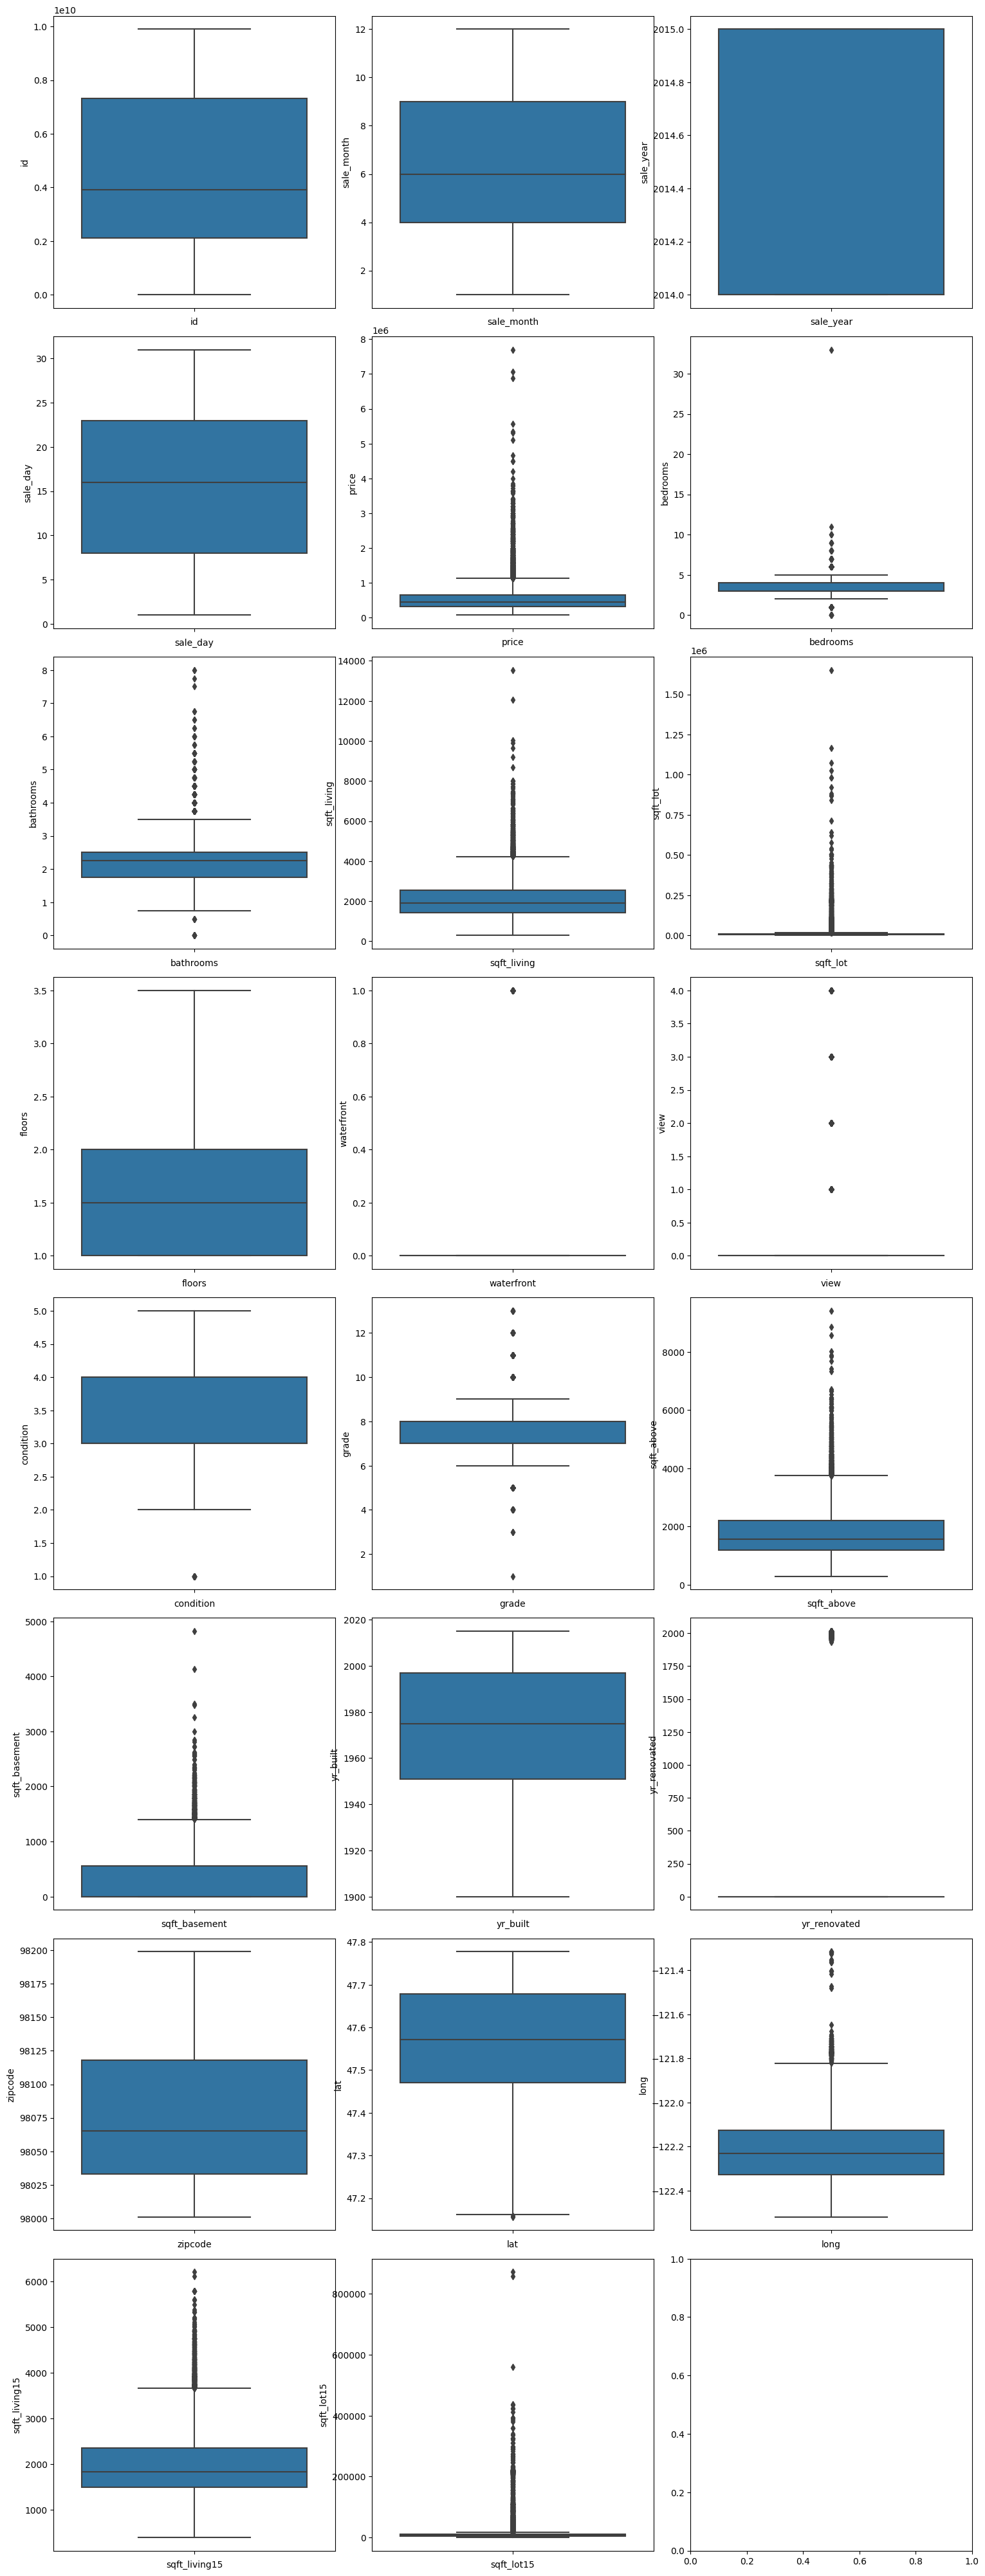

In [484]:
columns = df.columns.drop(['date'])
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(data=df, y=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)
plt.show()

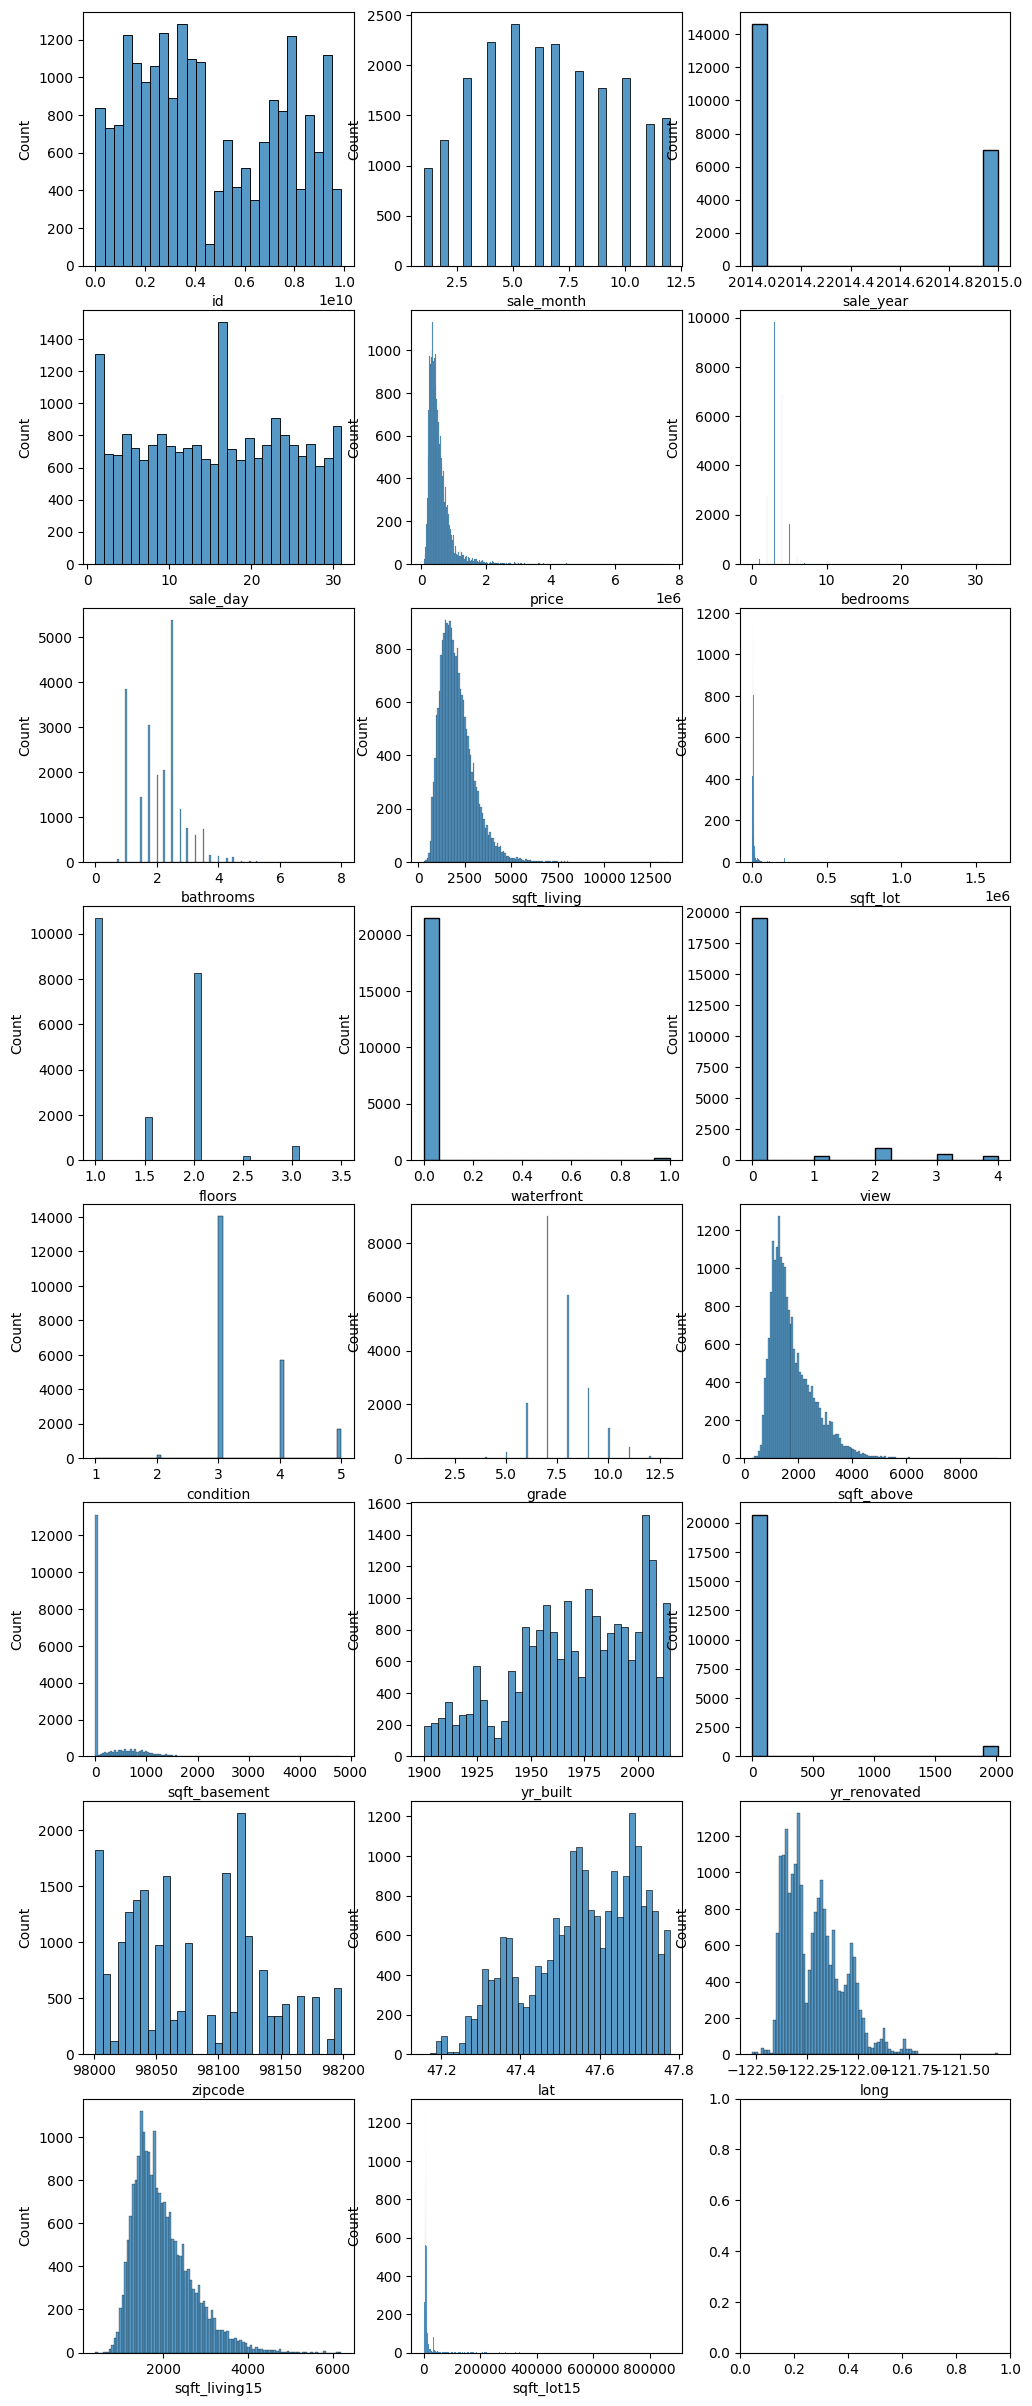

In [485]:
# Set the number of rows and columns for the subplots grid
num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Set the size of the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
fig.tight_layout()

# Iterate over the columns and create the density plots
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()


In [486]:
print(df[df['bedrooms'] > 30])

               id       date  sale_month  sale_year  sale_day     price   
15870  2402100895 2014-06-25           6       2014        25  640000.0  \

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade  sqft_above   
15870        33       1.75         1620      6000  ...      7        1040  \

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long   
15870            580      1947             0    98103  47.6878 -122.331  \

       sqft_living15  sqft_lot15  
15870           1330        4700  

[1 rows x 24 columns]


In [487]:
print(df[df['bathrooms'] == 0])

               id       date  sale_month  sale_year  sale_day      price   
875    6306400140 2014-06-12           6       2014        12  1095000.0  \
1149   3421079032 2015-02-17           2       2015        17    75000.0   
3119   3918400017 2015-02-05           2       2015         5   380000.0   
5832   5702500050 2014-11-04          11       2014         4   280000.0   
6994   2954400190 2014-06-24           6       2014        24  1295650.0   
9773   3374500520 2015-04-29           4       2015        29   355000.0   
9854   7849202190 2014-12-23          12       2014        23   235000.0   
10481   203100435 2014-09-18           9       2014        18   484000.0   
14423  9543000205 2015-04-13           4       2015        13   139950.0   
19452  3980300371 2014-09-26           9       2014        26   142000.0   

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade  sqft_above   
875           0        0.0         3064      4764  ...      7        3064  \
1149     

In [488]:
df= df[df['bathrooms'] != 0]
df=df[df['bedrooms'] != 33]

In [489]:
z_scores = stats.zscore(df['price'])
outliers_mask = np.abs(z_scores) > 4
outliers = df[outliers_mask]
print(outliers)

               id       date  sale_month  sale_year  sale_day      price   
153    7855801670 2015-04-01           4       2015         1  2250000.0  \
246    2025069065 2014-09-29           9       2014        29  2400000.0   
269    7960900060 2015-05-04           5       2015         4  2900000.0   
282    7424700045 2015-05-13           5       2015        13  2050000.0   
300    3225069065 2014-06-24           6       2014        24  3075000.0   
...           ...        ...         ...        ...       ...        ...   
21310  2154970020 2014-07-03           7       2014         3  2351960.0   
21368  9533100285 2014-06-30           6       2014        30  2065000.0   
21506  2524069097 2014-05-09           5       2014         9  2238890.0   
21530  8964800330 2015-04-07           4       2015         7  3000000.0   
21576  9253900271 2015-01-07           1       2015         7  3567000.0   

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade  sqft_above   
153       

In [490]:
outliers.describe()

,id,date,sale_month,sale_year,sale_day,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.970000e+02,197,197.000000,197.000000,197.000000,1.970000e+02,197.000000,197.000000,197.000000,197.000000,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,4.084845e+09,2014-10-30 16:12:10.964466944,6.553299,2014.329949,15.299492,2.779318e+06,4.350254,3.859137,5060.654822,22733.812183,...,10.715736,4028.492386,1032.162437,1971.522843,324.380711,98063.563452,47.619316,-122.240218,3500.065990,18392.822335
min,4.610050e+07,2014-05-02 00:00:00,1.000000,2014.000000,1.000000,2.027000e+06,2.000000,1.750000,3000.000000,3452.000000,...,7.000000,1830.000000,0.000000,1904.000000,0.000000,98004.000000,47.416900,-122.410000,1680.000000,2199.000000
25%,1.860600e+09,2014-07-11 00:00:00,4.000000,2014.000000,8.000000,2.250000e+06,4.000000,3.250000,4090.000000,10000.000000,...,10.000000,3110.000000,0.000000,1939.000000,0.000000,98008.000000,47.588400,-122.286000,3000.000000,8620.000000
50%,3.625049e+09,2014-10-14 00:00:00,6.000000,2014.000000,14.000000,2.500000e+06,4.000000,3.750000,4700.000000,16015.000000,...,11.000000,3800.000000,1030.000000,1985.000000,0.000000,98040.000000,47.626300,-122.233000,3460.000000,13912.000000
75%,6.072800e+09,2015-02-18 00:00:00,9.000000,2015.000000,23.000000,3.000000e+06,5.000000,4.500000,5510.000000,22257.000000,...,11.000000,4570.000000,1600.000000,2003.000000,0.000000,98112.000000,47.638900,-122.210000,3960.000000,19602.000000
max,9.831200e+09,2015-05-13 00:00:00,12.000000,2015.000000,30.000000,7.700000e+06,8.000000,8.000000,13540.000000,453895.000000,...,13.000000,9410.000000,4820.000000,2014.000000,2013.000000,98199.000000,47.749300,-121.982000,6210.000000,217800.000000
std,2.780012e+09,NaN,3.095990,0.471392,8.918374,8.450292e+05,0.981545,1.094755,1565.563536,40121.311871,...,1.143038,1324.029242,868.441234,35.600759,738.473379,54.635642,0.048642,0.083957,751.363278,23894.458546


In [491]:
df = df[df['price']< 2000000]

In [492]:
df.describe()

,id,date,sale_month,sale_year,sale_day,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.139700e+04,21397,21397.000000,21397.000000,21397.000000,2.139700e+04,21397.000000,21397.000000,21397.000000,2.139700e+04,...,21397.000000,21397.00000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000
mean,4.585573e+09,2014-10-29 04:33:46.377529600,6.574940,2014.322896,15.690377,5.189640e+05,3.361593,2.099184,2052.006169,1.503534e+04,...,7.628499,1767.31023,284.695939,1970.994392,82.267748,98078.079591,47.559499,-122.213720,1972.277702,12714.251297
min,1.000102e+06,2014-05-02 00:00:00,1.000000,2014.000000,1.000000,7.800000e+04,0.000000,0.500000,370.000000,5.200000e+02,...,3.000000,370.00000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124069e+09,2014-07-22 00:00:00,4.000000,2014.000000,8.000000,3.200000e+05,3.000000,1.500000,1420.000000,5.027000e+03,...,7.000000,1190.00000,0.000000,1952.000000,0.000000,98033.000000,47.469200,-122.329000,1480.000000,5100.000000
50%,3.904990e+09,2014-10-16 00:00:00,6.000000,2014.000000,16.000000,4.500000e+05,3.000000,2.250000,1900.000000,7.577000e+03,...,7.000000,1550.00000,0.000000,1975.000000,0.000000,98065.000000,47.570700,-122.230000,1830.000000,7600.000000
75%,7.316400e+09,2015-02-17 00:00:00,9.000000,2015.000000,23.000000,6.350000e+05,4.000000,2.500000,2520.000000,1.055000e+04,...,8.000000,2190.00000,550.000000,1997.000000,0.000000,98118.000000,47.678300,-122.124000,2340.000000,10023.000000
max,9.900000e+09,2015-05-27 00:00:00,12.000000,2015.000000,31.000000,1.999950e+06,11.000000,7.500000,7730.000000,1.651359e+06,...,13.000000,7420.00000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000
std,2.877562e+09,NaN,3.115697,0.467594,8.632334,2.865553e+05,0.899912,0.746265,862.738977,4.144327e+04,...,1.135516,792.41759,430.695617,29.313448,396.784910,53.484584,0.139011,0.141154,668.465196,27338.798537


In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21397 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21397 non-null  int64         
 1   date           21397 non-null  datetime64[ns]
 2   sale_month     21397 non-null  int32         
 3   sale_year      21397 non-null  int32         
 4   sale_day       21397 non-null  int32         
 5   price          21397 non-null  float64       
 6   bedrooms       21397 non-null  int64         
 7   bathrooms      21397 non-null  float64       
 8   sqft_living    21397 non-null  int64         
 9   sqft_lot       21397 non-null  int64         
 10  floors         21397 non-null  float64       
 11  waterfront     21397 non-null  int64         
 12  view           21397 non-null  int64         
 13  condition      21397 non-null  int64         
 14  grade          21397 non-null  int64         
 15  sqft_above     21397 non

In [494]:
correlations = [(column, df[column].corr(df['price'])) for column in columns]
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

for column, corr_coeff in correlations_sorted:
    print(f"Correlation between {column} and price: {corr_coeff:.2f}")


Correlation between price and price: 1.00
Correlation between grade and price: 0.68
Correlation between sqft_living and price: 0.68
Correlation between sqft_living15 and price: 0.60
Correlation between sqft_above and price: 0.58
Correlation between bathrooms and price: 0.51
Correlation between lat and price: 0.36
Correlation between view and price: 0.34
Correlation between bedrooms and price: 0.32
Correlation between sqft_basement and price: 0.29
Correlation between floors and price: 0.28
Correlation between waterfront and price: 0.14
Correlation between yr_renovated and price: 0.12
Correlation between sqft_lot and price: 0.10
Correlation between sqft_lot15 and price: 0.09
Correlation between yr_built and price: 0.06
Correlation between zipcode and price: -0.05
Correlation between long and price: 0.04
Correlation between condition and price: 0.04
Correlation between sale_month and price: -0.02
Correlation between sale_day and price: -0.01
Correlation between id and price: -0.01
Correla

In [495]:
df['grade_value'] = df['grade'] * df['sqft_living']
df['price_per_sqft'] = df['price']/df['sqft_living']
df['renovated'] = np.where(df['yr_renovated'] == 0, 0, 1)
df['sqft_per_floor'] = df['sqft_living']/df['floors']

In [496]:
zip_price_per_sqft = df.groupby('zipcode')['price'].mean() / df.groupby('zipcode')['sqft_living'].mean()
df = df.merge(zip_price_per_sqft.rename('zip_price_per_sqft'), left_on='zipcode', right_index=True)

In [497]:
df['sqft_living_squared'] = df['sqft_living'] ** 2

In [498]:
num_bins = 5
bin_width = (df['bathrooms'].max() - df['bathrooms'].min()) / num_bins
bins = [df['bathrooms'].min() + i * bin_width for i in range(num_bins+1)]
df['bathrooms_bin'] = pd.cut(df['bathrooms'], bins=bins, labels=False, include_lowest=True)

In [499]:
num_bins = 5
bin_width = (df['bedrooms'].max() - df['bedrooms'].min()) / num_bins
bins = [df['bedrooms'].min() + i * bin_width for i in range(num_bins+1)]
df['bedrooms_bin'] = pd.cut(df['bedrooms'], bins=bins, labels=False, include_lowest=True)

In [500]:
num_bins = 5
bin_width = (df['sqft_living'].max() - df['sqft_living'].min()) / num_bins
bins = [df['sqft_living'].min() + i * bin_width for i in range(num_bins+1)]
df['sqft_living_bins'] = pd.cut(df['sqft_living'], bins=bins, labels=False, include_lowest=True)

In [501]:
columns = df.columns.drop(['id', 'date'])

In [502]:
correlations = [(column, df[column].corr(df['price'])) for column in columns]
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

for column, corr_coeff in correlations_sorted:
    print(f"Correlation between {column} and price: {corr_coeff:.2f}")

Correlation between price and price: 1.00
Correlation between grade_value and price: 0.73
Correlation between grade and price: 0.68
Correlation between sqft_living and price: 0.68
Correlation between sqft_living_squared and price: 0.67
Correlation between sqft_living_bins and price: 0.61
Correlation between sqft_living15 and price: 0.60
Correlation between sqft_above and price: 0.58
Correlation between zip_price_per_sqft and price: 0.58
Correlation between price_per_sqft and price: 0.52
Correlation between bathrooms and price: 0.51
Correlation between bathrooms_bin and price: 0.44
Correlation between sqft_per_floor and price: 0.39
Correlation between lat and price: 0.36
Correlation between view and price: 0.34
Correlation between bedrooms and price: 0.32
Correlation between sqft_basement and price: 0.29
Correlation between floors and price: 0.28
Correlation between bedrooms_bin and price: 0.24
Correlation between waterfront and price: 0.14
Correlation between yr_renovated and price: 0.

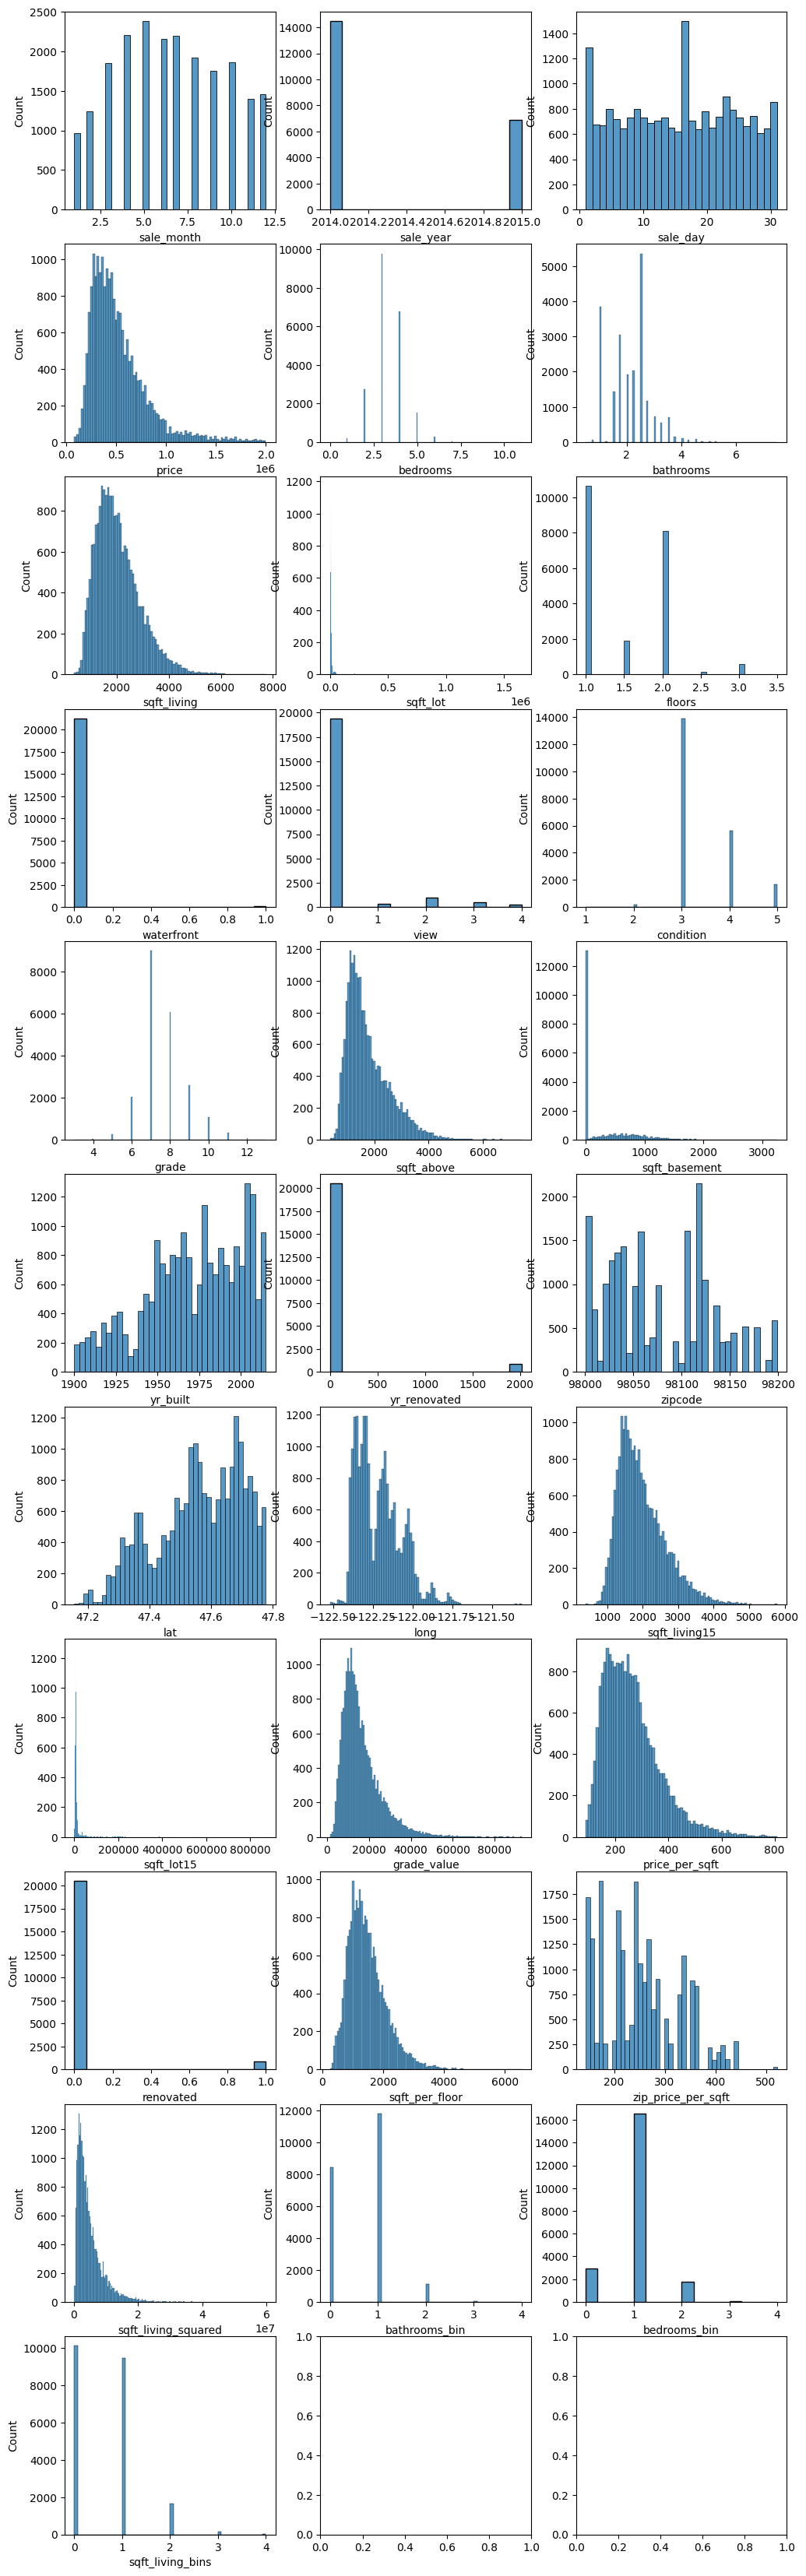

In [503]:
# Set the number of rows and columns for the subplots grid
num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Set the size of the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
fig.tight_layout()

# Iterate over the columns and create the density plots
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

In [504]:
df['log_sqft_living'] = np.log(df['sqft_living'])
df['log_sqft_above'] = np.log(df['sqft_above'])
df['log_sqft_living15'] = np.log(df['sqft_living15'])
df['log_grade_value'] = np.log(df['grade_value'])
df['log_sqft_per_floor'] = np.log(df['sqft_per_floor'])
df['log_price'] = np.log(df['price'])

In [505]:
columns = df.columns.drop(['id', 'date'])

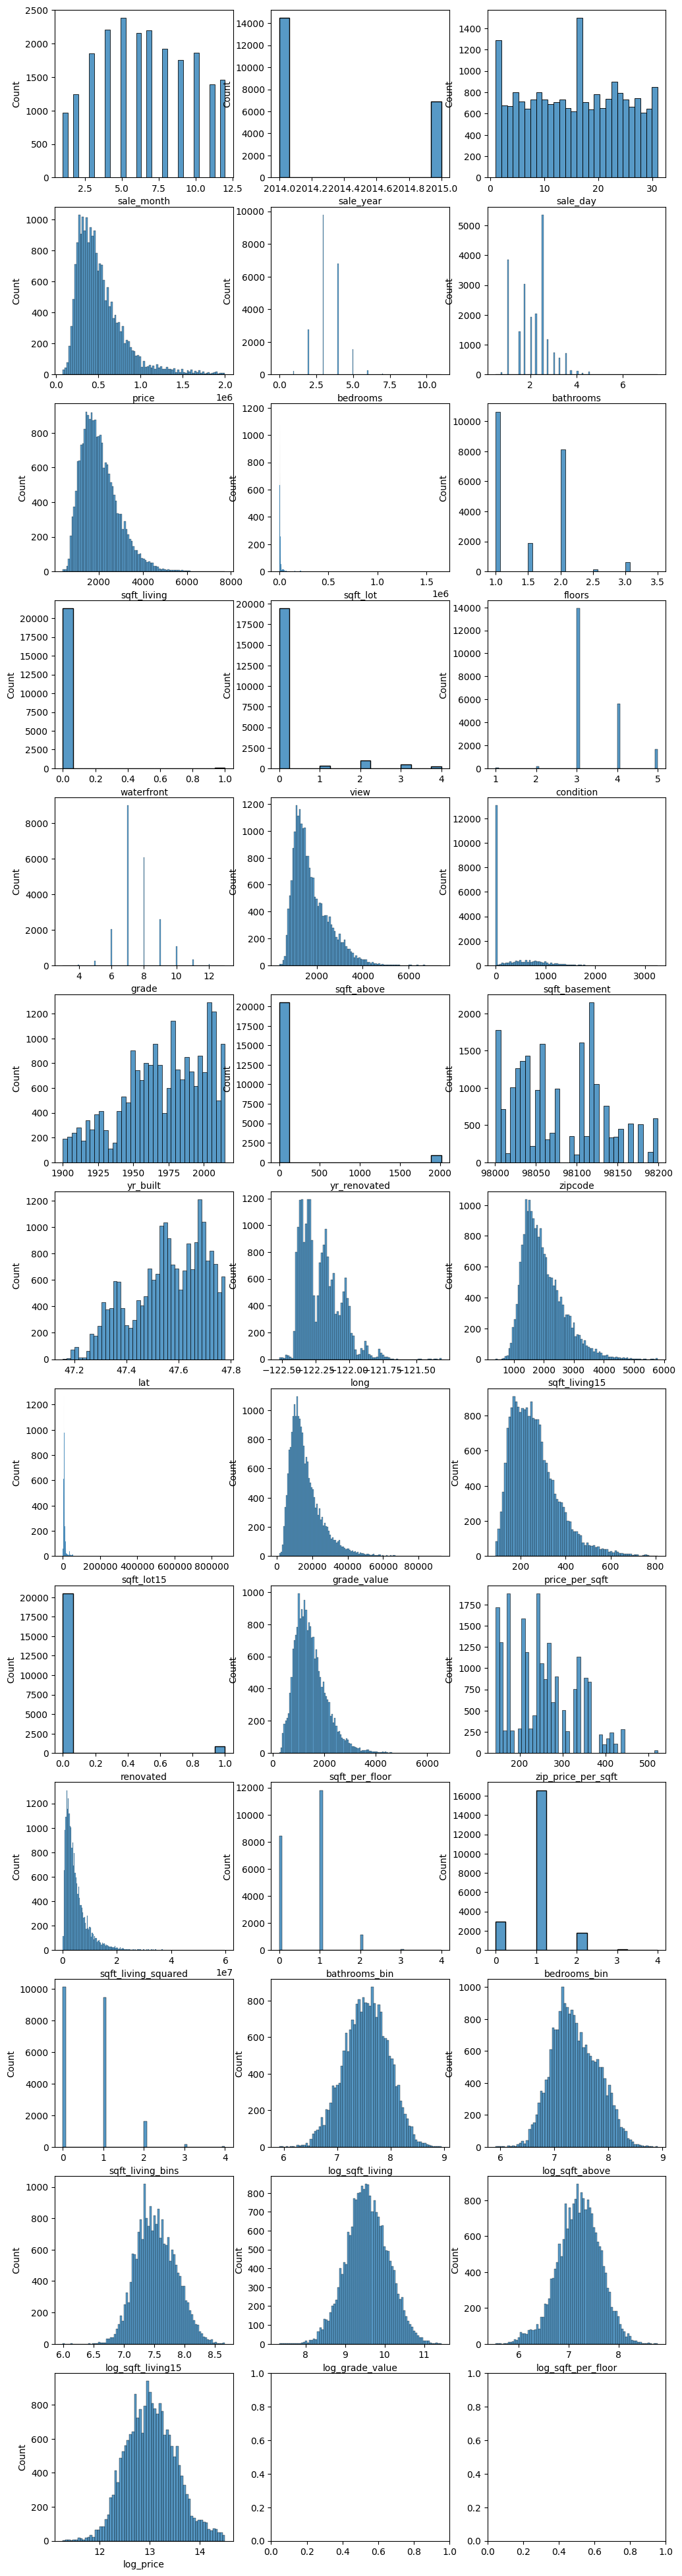

In [506]:
# Set the number of rows and columns for the subplots grid
num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Set the size of the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
fig.tight_layout()

# Iterate over the columns and create the density plots
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

In [507]:
correlations = [(column, df[column].corr(df['price'])) for column in columns]
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

for column, corr_coeff in correlations_sorted:
    print(f"Correlation between {column} and price: {corr_coeff:.2f}")

Correlation between price and price: 1.00
Correlation between log_price and price: 0.94
Correlation between grade_value and price: 0.73
Correlation between grade and price: 0.68
Correlation between sqft_living and price: 0.68
Correlation between sqft_living_squared and price: 0.67
Correlation between log_grade_value and price: 0.67
Correlation between log_sqft_living and price: 0.63
Correlation between sqft_living_bins and price: 0.61
Correlation between sqft_living15 and price: 0.60
Correlation between sqft_above and price: 0.58
Correlation between zip_price_per_sqft and price: 0.58
Correlation between log_sqft_living15 and price: 0.57
Correlation between log_sqft_above and price: 0.55
Correlation between price_per_sqft and price: 0.52
Correlation between bathrooms and price: 0.51
Correlation between bathrooms_bin and price: 0.44
Correlation between sqft_per_floor and price: 0.39
Correlation between log_sqft_per_floor and price: 0.37
Correlation between lat and price: 0.36
Correlation

In [508]:
results = ols("price ~ grade_value + grade + log_grade_value + sqft_living + sqft_living_squared + log_sqft_living + sqft_living_bins +  sqft_living15 + log_sqft_living15 + sqft_above + log_sqft_above + zip_price_per_sqft + bathrooms + bathrooms_bin + sqft_per_floor + log_sqft_per_floor + lat + view + sqft_basement + bedrooms", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     5469.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:23:42   Log-Likelihood:            -2.8031e+05
No. Observations:               21397   AIC:                         5.607e+05
Df Residuals:                   21377   BIC:                         5.608e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.328e+04    

In [509]:
def quantile_loss(y_test, elasticnet_pred, q):
    residual = y_test - elasticnet_pred
    loss = np.where(residual >= 0, q * residual, (q - 1) * residual)
    return np.mean(loss)

In [510]:
df.reset_index(drop=True, inplace=True)

In [511]:
categorical_features = ['grade', 'view', 'bathrooms_bin']
numerical_features = ['grade_value', 'log_grade_value', 'sqft_living', 'sqft_living_squared', 'log_sqft_living','sqft_living_bins','sqft_above', 'log_sqft_above', 'sqft_living15', 'log_sqft_living15','zip_price_per_sqft', 'bathrooms', 'bathrooms_bin','sqft_per_floor', 'log_sqft_per_floor','lat','sqft_basement', 'bedrooms']
target = 'price'

In [512]:
categorical_features = ['grade', 'view', 'bathrooms_bin','sqft_living_bins']
numerical_features = [ 'log_grade_value', 'log_sqft_living', 'log_sqft_above', 'log_sqft_living15','zip_price_per_sqft', 'bathrooms','log_sqft_per_floor','lat','sqft_basement', 'bedrooms']
target = 'price'

In [513]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],df[target], test_size = 0.3, random_state=1234)

In [514]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))])

In [515]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categorical_features),
    ('num', num_transformer, numerical_features)])

In [516]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_regression.fit(X_train, y_train)
linear_pred = linear_regression.predict(X_test)
print(linear_pred)

np.sqrt(mean_squared_error(linear_pred,y_test))

[ 986646.  375710. 1036354. ...  156944.  239800.  664940.]


2716643017768113.5

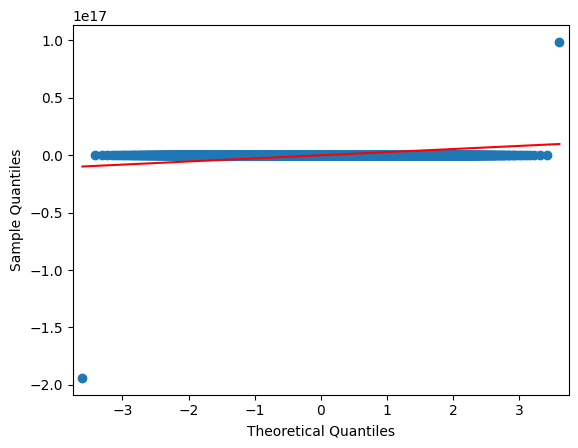

In [517]:
residuals = y_test - linear_pred
sm.qqplot(residuals, line='s')
plt.show()

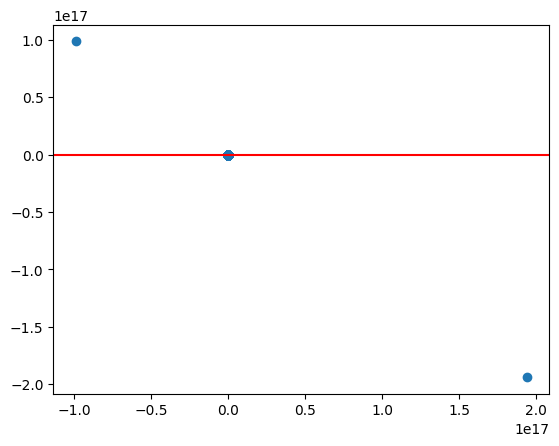

In [518]:
residuals = y_test - linear_pred
plt.scatter(linear_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [519]:
ridge_alphas = [0.1, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0] 

best_rmse = float('inf') 
best_alpha = None 

for alpha in ridge_alphas:
  
    ridge_regression = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=alpha))
    ])

    ridge_regression.fit(X_train, y_train)

    ridge_pred = ridge_regression.predict(X_test)

    rmse = np.sqrt(mean_squared_error(ridge_pred, y_test))

    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

print("Best Alpha:", best_alpha)
print("Best RMSE:", best_rmse)

r2 = r2_score(y_test, ridge_pred)
print("R-squared (R^2):", r2)


quantiles = [0.99, 0.95, 0.9, 0.5]

for quantile in quantiles:
    loss = quantile_loss(y_test, ridge_pred, quantile)
    print(f"Quantile Loss ({quantile}): {loss}")

Best Alpha: 0.1
Best RMSE: 122297.75156377006
R-squared (R^2): 0.8205325848105813
Quantile Loss (0.99): 41680.77011157699
Quantile Loss (0.95): 41669.635242638695
Quantile Loss (0.9): 41655.716656465826
Quantile Loss (0.5): 41544.36796708287


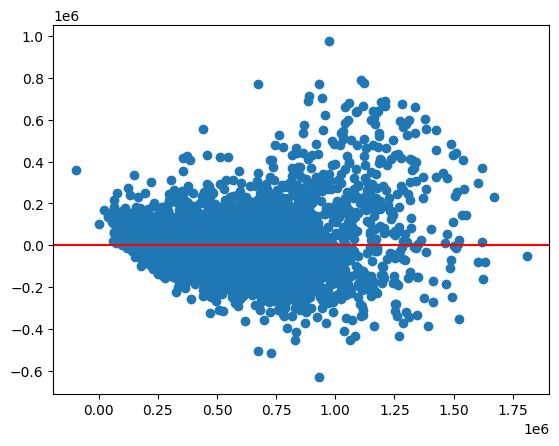

In [520]:
residuals = y_test - ridge_pred

plt.scatter(ridge_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

In [521]:
lasso_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=3.0, max_iter=2000, tol=0.001))
])

lasso_regression.fit(X_train, y_train)
lasso_pred = lasso_regression.predict(X_test)
print('Lasso Regression RMSE:', np.sqrt(mean_squared_error(lasso_pred, y_test)))

r2 = r2_score(y_test, lasso_pred)
print("R-squared (R^2):", r2)


quantiles = [0.99, 0.95, 0.9, 0.5]

for quantile in quantiles:
    loss = quantile_loss(y_test, lasso_pred, quantile)
    print(f"Quantile Loss ({quantile}): {loss}")

Lasso Regression RMSE: 122469.32333563542
R-squared (R^2): 0.8202746869297197
Quantile Loss (0.99): 41651.77898864456
Quantile Loss (0.95): 41640.94749940416
Quantile Loss (0.9): 41627.40813785364
Quantile Loss (0.5): 41519.09324544959


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.900e+13, tolerance: 1.221e+12
  model = cd_fast.enet_coordinate_descent(


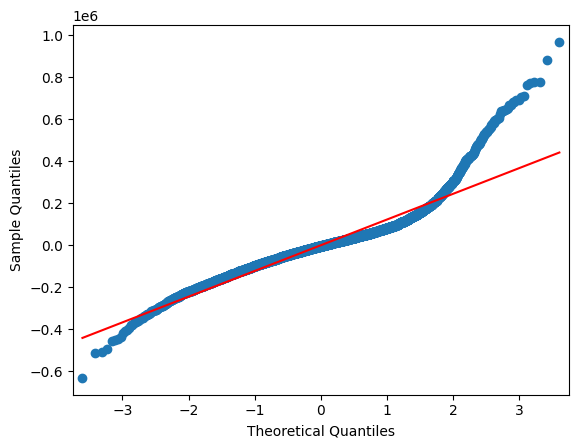

In [522]:
residuals = y_test - lasso_pred
sm.qqplot(residuals, line='s')
plt.show()

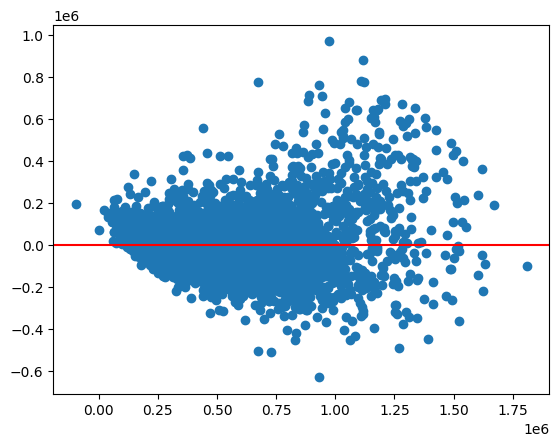

In [523]:
residuals = y_test - lasso_pred

plt.scatter(ridge_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

In [524]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))])

elasticnet_regression.fit(X_train, y_train)
elasticnet_pred = elasticnet_regression.predict(X_test)

print('Elastic Regression RMSE:', np.sqrt(mean_squared_error(elasticnet_pred, y_test)))

r2 = r2_score(y_test, elasticnet_pred)
print("R-squared (R^2):", r2)


quantiles = [0.99, 0.95, 0.9, 0.5]

for quantile in quantiles:
    loss = quantile_loss(y_test, elasticnet_pred, quantile)
    print(f"Quantile Loss ({quantile}): {loss}")

Elastic Regression RMSE: 138726.90645578993
R-squared (R^2): 0.7693911256824003
Quantile Loss (0.99): 45628.610665249405
Quantile Loss (0.95): 45620.79242313775
Quantile Loss (0.9): 45611.01962049816
Quantile Loss (0.5): 45532.83719938149


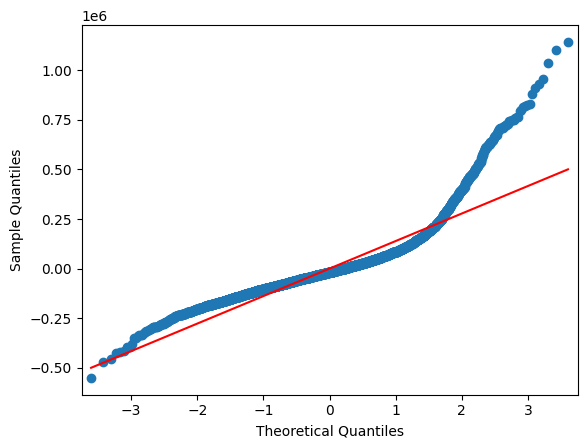

In [525]:
residuals = y_test - elasticnet_pred
sm.qqplot(residuals, line='s')
plt.show()

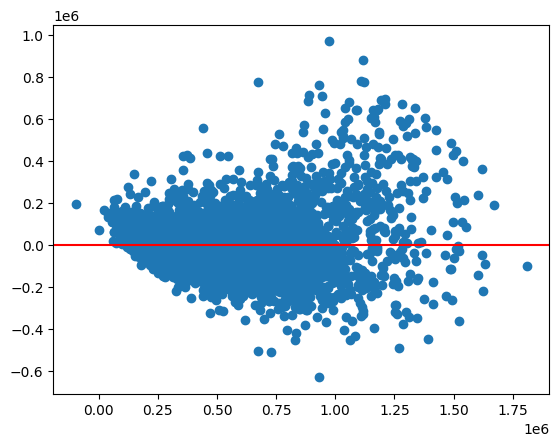

In [526]:
residuals = y_test - lasso_pred

plt.scatter(ridge_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

In [527]:
results = ols("log_price ~ grade + log_grade_value + log_sqft_living + sqft_living_bins + log_sqft_living15 + log_sqft_above + zip_price_per_sqft + bathrooms + bathrooms_bin + log_sqft_per_floor + lat + view + sqft_basement + bedrooms", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     9057.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:23:47   Log-Likelihood:                 5192.0
No. Observations:               21397   AIC:                        -1.035e+04
Df Residuals:                   21382   BIC:                        -1.023e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -9.7927      0

In [528]:
price_mean = df['price'].mean()

In [529]:
price = df['price'].median()

In [530]:
target = 'log_price'

In [531]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],df[target], test_size = 0.3, random_state=1234)

In [532]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression.fit(X_train, y_train)

linear_pred_log = linear_regression.predict(X_test)

linear_pred = np.exp(linear_pred_log)
print(linear_pred)

rmse_price = np.sqrt(mean_squared_error(linear_pred, np.exp(y_test)))
print('Price RMSE:', rmse_price)

rmse_log_price = np.sqrt(mean_squared_error(linear_pred_log, y_test))
print('Log_Price RMSE:', rmse_log_price)

[1025632.76572704  378049.74515965  858433.66260999 ...  215532.83214738
  242466.92916167  554360.61230659]


/var/folders/4r/t2pxznrn4dz28d6ymprq1p9c0000gn/T/ipykernel_77594/3475440901.py:10: RuntimeWarning: overflow encountered in exp
  linear_pred = np.exp(linear_pred_log)


ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
print('RMSE to mean ratio:', rmse_price/price_mean)

RMSE to mean ratio: 0.25576683123957766


In [ ]:
sup_rmse_ratio = (79474/485793)
print(sup_rmse_ratio)

0.16359642893166432


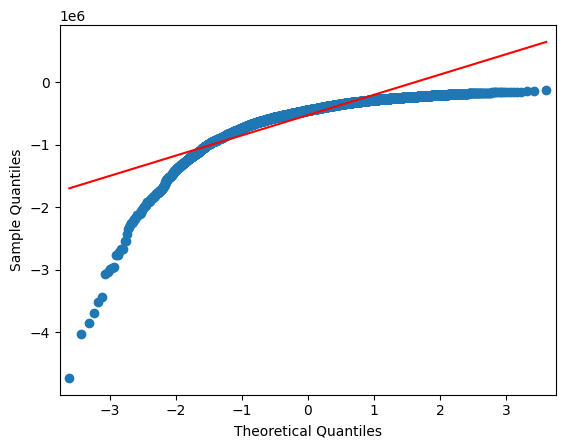

In [ ]:
residuals = y_test - linear_pred
sm.qqplot(residuals, line='s')
plt.show()

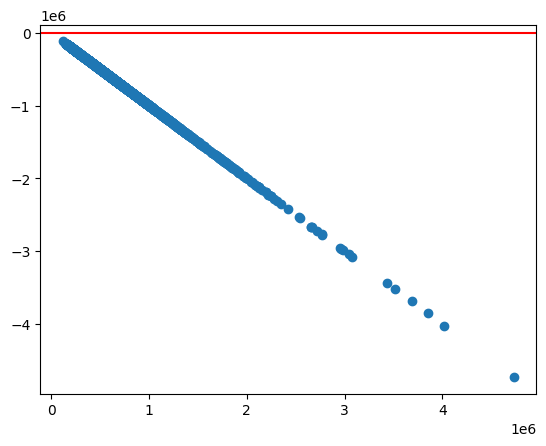

In [ ]:
residuals = y_test - linear_pred

plt.scatter(linear_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

In [ ]:
df.describe(include='all')

,id,date,sale_month,sale_year,sale_day,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,sqft_living_squared,bathrooms_bin,bedrooms_bin,sqft_living_bins,log_sqft_living,log_sqft_above,log_sqft_living15,log_grade_value,log_sqft_per_floor,log_price
count,2.160200e+04,21602,21602.000000,21602.000000,21602.000000,2.160200e+04,21602.000000,21602.000000,21602.000000,2.160200e+04,...,2.160200e+04,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000
mean,4.580335e+09,2014-10-29 04:27:58.511248896,6.574484,2014.322933,15.687112,5.401261e+05,3.370892,2.115753,2080.126146,1.510684e+04,...,5.169906e+06,0.548468,0.955699,0.147579,7.550562,7.395046,7.539506,9.574954,7.212018,13.047984
min,1.000102e+06,2014-05-02 00:00:00,1.000000,2014.000000,1.000000,7.800000e+04,0.000000,0.500000,370.000000,5.200000e+02,...,1.369000e+05,0.000000,0.000000,0.000000,5.913503,5.913503,5.988961,7.336937,5.534706,11.264464
25%,2.123049e+09,2014-07-22 00:00:00,4.000000,2014.000000,8.000000,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,...,2.044900e+06,0.000000,1.000000,0.000000,7.265430,7.081709,7.306531,9.218309,6.932448,12.682307
50%,3.904930e+09,2014-10-16 00:00:00,6.000000,2014.000000,16.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,...,3.648100e+06,1.000000,1.000000,0.000000,7.554859,7.352441,7.517521,9.556763,7.222566,13.017003
75%,7.308900e+09,2015-02-17 00:00:00,9.000000,2015.000000,23.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068475e+04,...,6.502500e+06,1.000000,1.000000,0.000000,7.843849,7.700748,7.766417,9.933532,7.506592,13.377006
max,9.900000e+09,2015-05-27 00:00:00,12.000000,2015.000000,31.000000,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,...,1.833316e+08,4.000000,4.000000,4.000000,9.513404,9.149528,8.733916,11.998310,9.173676,15.856731
std,2.876737e+09,NaN,3.115233,0.467608,8.635193,3.671168e+05,0.905733,0.769010,918.161484,4.143004e+04,...,5.406079e+06,0.555755,0.485263,0.370272,0.424427,0.427312,0.327437,0.544938,0.431956,0.526428


<Axes: ylabel='Count'>

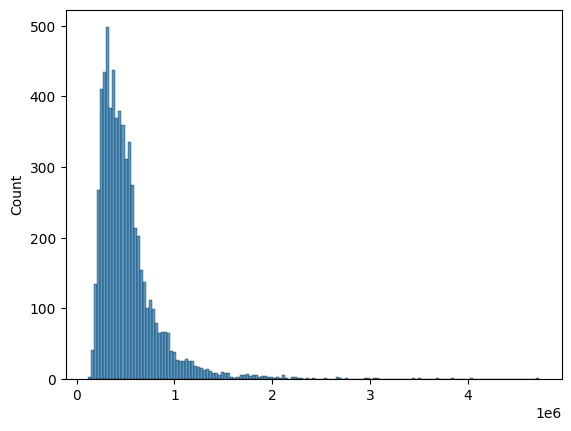

In [ ]:
sns.histplot(linear_pred)

In [ ]:
df[df['price']>1500000]

,id,date,sale_month,sale_year,sale_day,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,sqft_living_squared,bathrooms_bin,bedrooms_bin,sqft_living_bins,log_sqft_living,log_sqft_above,log_sqft_living15,log_grade_value,log_sqft_per_floor,log_price
1420,8073000550,2015-04-15,4,2015,15,1700000.0,4,3.75,3190,17186,...,10176100,2,1,1,8.067776,8.067776,7.736307,10.370361,7.374629,14.346139
15039,2726049034,2014-11-10,11,2014,10,2000000.0,3,3.25,2610,16387,...,6812100,1,1,0,7.867106,7.867106,7.859413,10.064330,7.173958,14.508658
17767,7352200450,2015-01-15,1,2015,15,2050000.0,4,3.25,3580,19989,...,12816400,1,1,1,8.183118,8.154788,7.787382,10.129028,7.777653,14.533350
18828,1455100355,2014-07-08,7,2014,8,1675000.0,3,2.50,3490,8343,...,12180100,1,1,1,8.157657,7.673223,8.003029,10.354882,7.464510,14.331324
15874,7403200050,2014-11-13,11,2014,13,1600000.0,3,2.25,3370,23065,...,11356900,1,1,1,8.122668,7.560080,8.134468,10.425253,8.122668,14.285514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19236,2525049086,2014-10-03,10,2014,3,2720000.0,4,3.25,3990,18115,...,15920100,1,1,1,8.291547,8.291547,8.146130,10.689442,7.598399,14.816142
19351,2525049113,2014-07-25,7,2014,25,1950000.0,4,3.50,4065,18713,...,16524225,1,1,1,8.310169,8.310169,8.029433,10.612754,7.617022,14.483340
20096,3262300485,2015-04-21,4,2015,21,2250000.0,5,5.25,3410,8118,...,11628100,3,2,1,8.134468,8.134468,8.134468,10.532363,7.441320,14.626441
21040,6447300365,2014-11-13,11,2014,13,2900000.0,5,4.00,5190,14600,...,26936100,2,2,1,8.554489,8.554489,8.253228,10.952384,7.861342,14.880221
